PROBLEM IS AN INCOME CLASSIFICATION PROBLEM. THE TASK IS TO GROUP MEMBERS OF THE POPULATION INTO ONE OF TWO INCOME 
GROUPS, "<=$50K",">$50K". 


Its a decent example of an end to end project that includes, some data visualization, data munging and predictive modeling/machine learning. 

IMPORTS

In [1]:

import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns', None)

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

plt.rc("font", size=14)

from sklearn.cross_validation import train_test_split


from sklearn.datasets import make_classification
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline



/Users/pro/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
income=pd.read_csv('train.csv')
income.head()



,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


# Data exploration and preliminary analysis

Here we plot and examine the various features as well as their relationship with the Target Variable (Income Group)

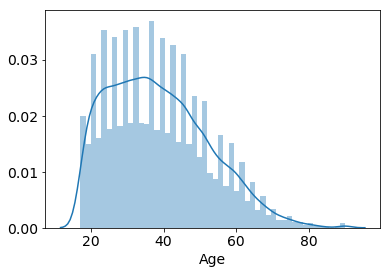

In [3]:
sns.distplot(income.Age)
plt.show()


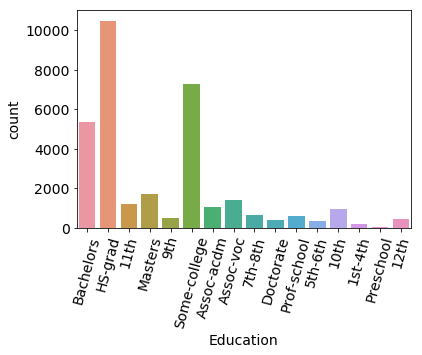

In [4]:
sns.countplot(x=income.Education)
plt.xticks(rotation=75)


plt.show()

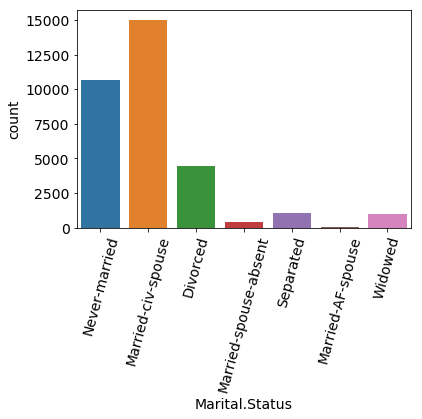

In [5]:
sns.countplot(x=income['Marital.Status'])
plt.xticks(rotation=75)


plt.show()

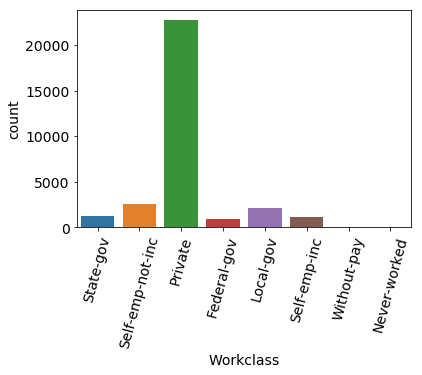

In [6]:
sns.countplot(x=income.Workclass)
plt.xticks(rotation=75)


plt.show()

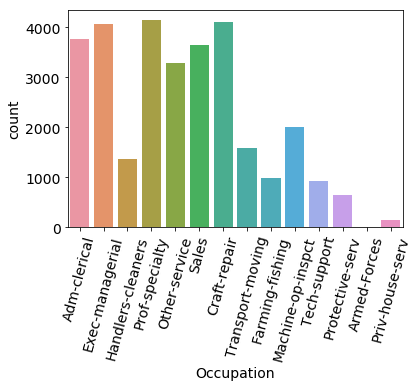

In [7]:
sns.countplot(x=income.Occupation)
plt.xticks(rotation=75)


plt.show()

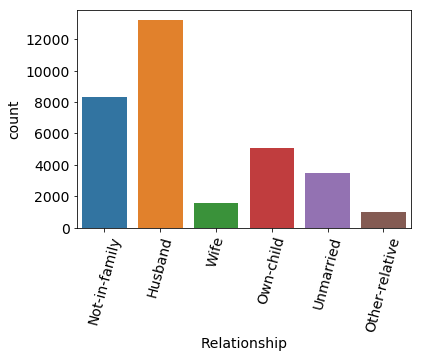

In [8]:
sns.countplot(x=income.Relationship)
plt.xticks(rotation=75)


plt.show()

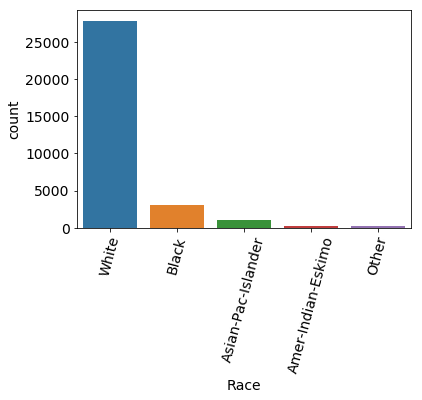

In [9]:
sns.countplot(x=income.Race)
plt.xticks(rotation=75)


plt.show()

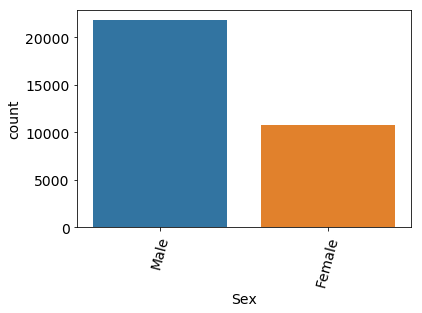

In [10]:
sns.countplot(x=income.Sex)
plt.xticks(rotation=75)


plt.show()

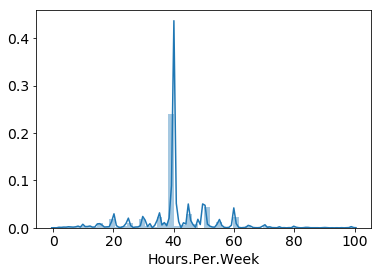

In [11]:
sns.distplot(income['Hours.Per.Week'])

plt.show()



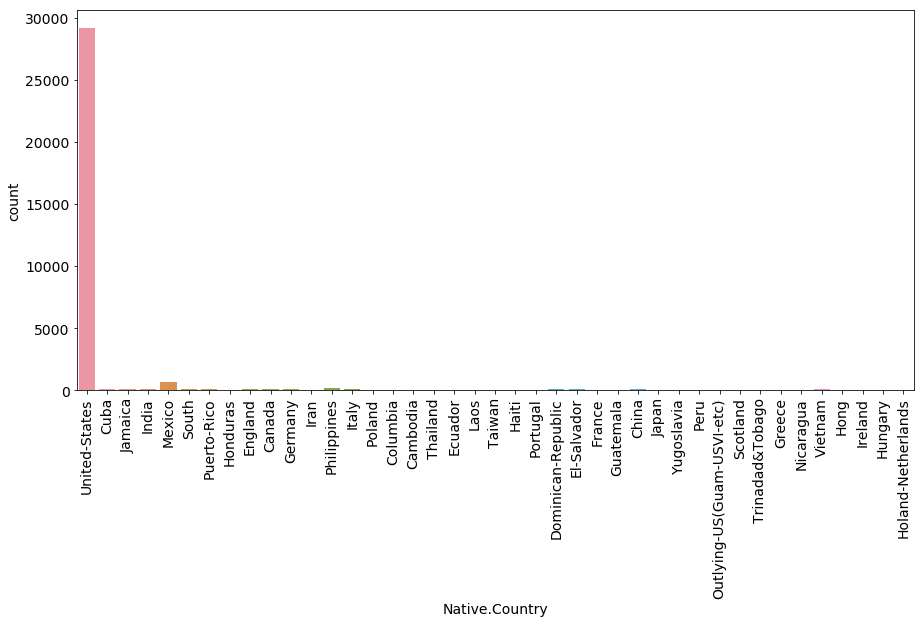

In [12]:

plt.figure(figsize=(15,7))


sns.countplot(x=income['Native.Country'])
plt.xticks(rotation=90)

plt.show()

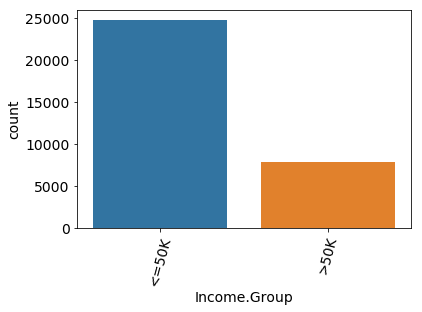

In [13]:
sns.countplot(x=income['Income.Group'])
plt.xticks(rotation=75)


plt.show()

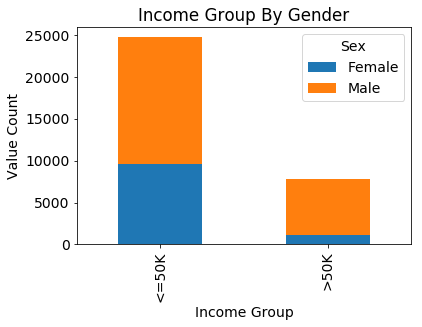

In [14]:
inc_sex=income.groupby(['Income.Group', 'Sex'])['Income.Group'].count().unstack('Sex')

my_plot = inc_sex.plot(kind='bar',stacked=True,title="Income Group By Gender")
my_plot.set_xlabel("Income Group")
my_plot.set_ylabel("Value Count")


plt.show()

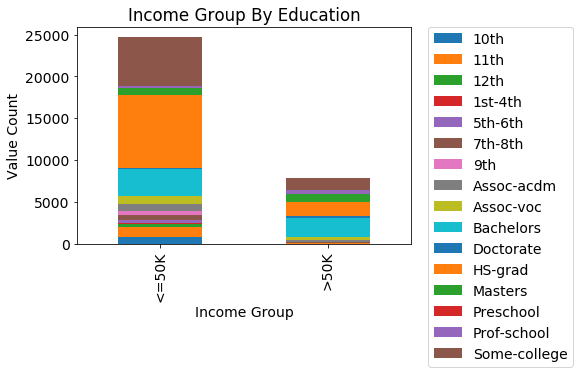

In [15]:
inc_ed=income.groupby(['Income.Group', 'Education'])['Income.Group'].count().unstack('Education')


my_plot = inc_ed.plot(kind='bar',stacked=True,title="Income Group By Education")
my_plot.set_xlabel("Income Group")
my_plot.set_ylabel("Value Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.show()

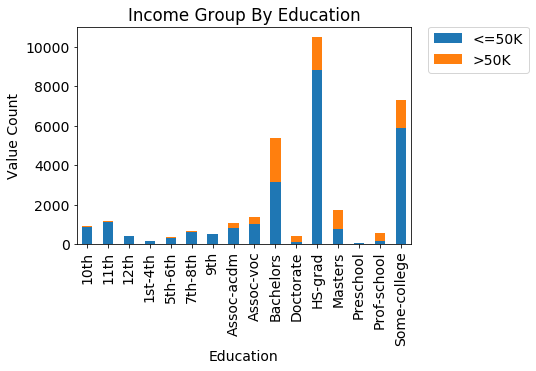

In [16]:
inc_ed=income.groupby(['Education', 'Income.Group'])['Education'].count().unstack('Income.Group')


my_plot = inc_ed.plot(kind='bar',stacked=True,title="Income Group By Education")
my_plot.set_xlabel("Education")
my_plot.set_ylabel("Value Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.show()

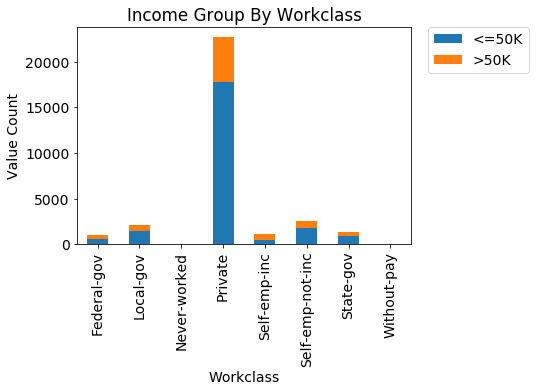

In [17]:
inc_wc=income.groupby(['Workclass', 'Income.Group'])['Workclass'].count().unstack('Income.Group')


my_plot = inc_wc.plot(kind='bar',stacked=True,title="Income Group By Workclass")
my_plot.set_xlabel("Workclass")
my_plot.set_ylabel("Value Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.show()




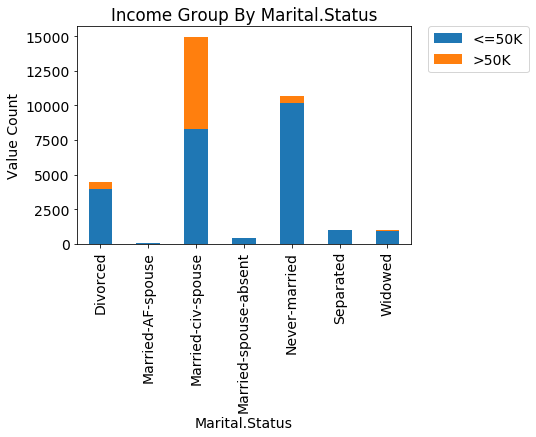

In [18]:
inc_ms=income.groupby(['Marital.Status', 'Income.Group'])['Marital.Status'].count().unstack('Income.Group')


my_plot = inc_ms.plot(kind='bar',stacked=True,title="Income Group By Marital.Status")
my_plot.set_xlabel("Marital.Status")
my_plot.set_ylabel("Value Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.show()





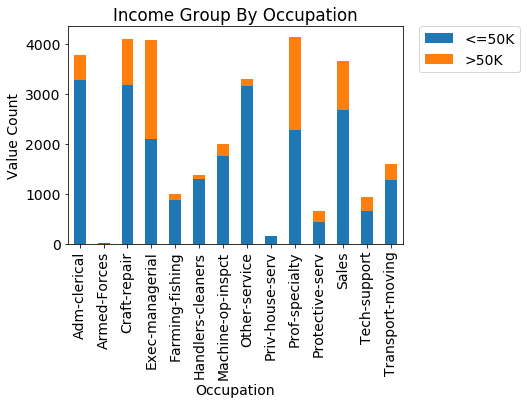

In [19]:
inc_ms=income.groupby(['Occupation', 'Income.Group'])['Occupation'].count().unstack('Income.Group')


my_plot = inc_ms.plot(kind='bar',stacked=True,title="Income Group By Occupation")
my_plot.set_xlabel("Occupation")
my_plot.set_ylabel("Value Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.show()






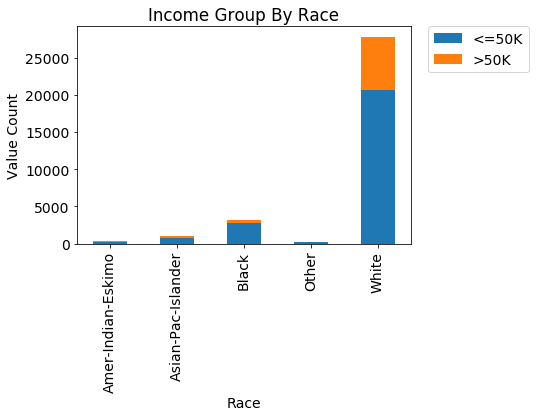

In [20]:
inc_ms=income.groupby(['Race', 'Income.Group'])['Race'].count().unstack('Income.Group')


my_plot = inc_ms.plot(kind='bar',stacked=True,title="Income Group By Race")
my_plot.set_xlabel("Race")
my_plot.set_ylabel("Value Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.show()







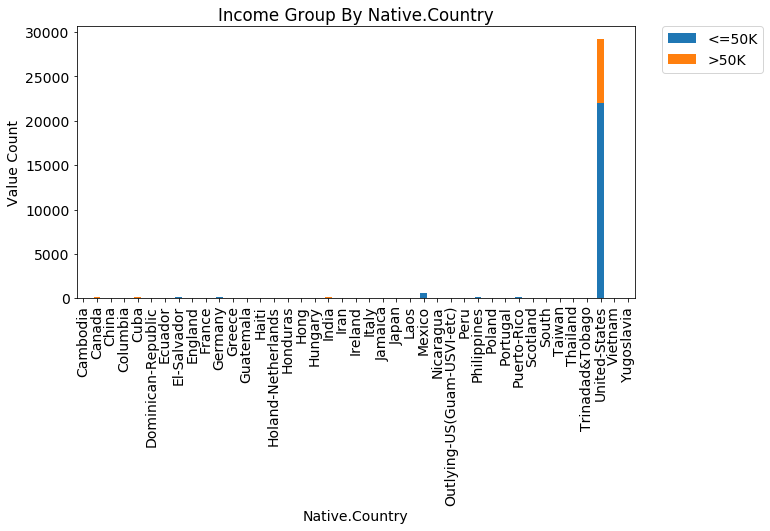

In [21]:


inc_ms=income.groupby(['Native.Country', 'Income.Group'])['Native.Country'].count().unstack('Income.Group')

my_plot=inc_ms.plot(kind='bar',stacked=True,title="Income Group By Native.Country",figsize=(10,5))
my_plot.set_xlabel("Native.Country")
my_plot.set_ylabel("Value Count")
my_plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()








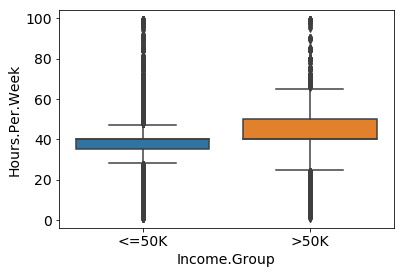

In [22]:
sns.boxplot(x="Income.Group",y="Hours.Per.Week", data=income)
plt.show()


# Preprocesing and Data Munging

From the above analysis, we see that 2 variables had features that werent very useful in their current state, ie, the
Education and Native Country variables. They contained too many classes that werent very useful for modeling purposes. 

I decided to transform these variables into something a bit more workable. I grouped all classes below HS-grad as "Dropout" since we realize that anything below a highschool graduate level has about the same effect or neglible differences at the very best on what income group would fall into, afterwhich i re-plot out the chart, giving you the cleaner and much more workable graph seen below.

In [23]:
income['Education'].unique()



array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [24]:
np.set_printoptions(threshold=np.nan)

income['Education'].unique()

grad=['Bachelors', 'HS-grad', 'Masters', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', 'Doctorate', 'Prof-school']

In [25]:
for index, row in income.iterrows():
    if income.loc[index, "Education"] not in grad:
        income.loc[index, "Education"]='Dropout'
        
income['Education'].unique()

array(['Bachelors', 'HS-grad', 'Dropout', 'Masters', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', 'Doctorate', 'Prof-school'],
      dtype=object)

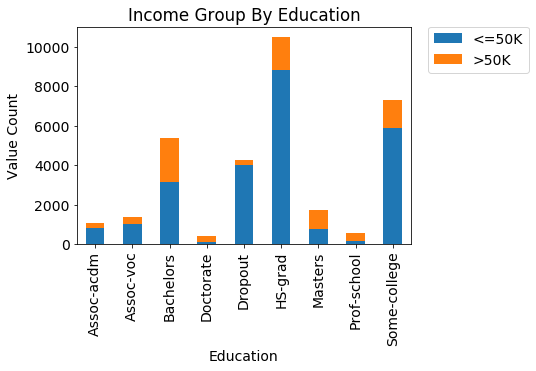

In [26]:
inc_ed=income.groupby(['Education', 'Income.Group'])['Education'].count().unstack('Income.Group')


my_plot = inc_ed.plot(kind='bar',stacked=True,title="Income Group By Education")
my_plot.set_xlabel("Education")
my_plot.set_ylabel("Value Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.show()

We do the same for the Native Country Variable, combining all non american classes as one "Foreign" class and then proceed to re=plot as seen below

In [27]:
income['Native.Country'].unique()


array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [28]:
for index, row in income.iterrows():
    if income.loc[index, "Native.Country"] !="United-States":
        income.loc[index, "Native.Country"]='Foreign'

income['Native.Country'].unique()



array(['United-States', 'Foreign'], dtype=object)

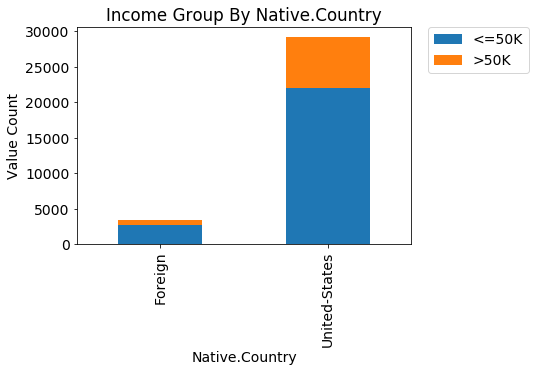

In [29]:
inc_ms=income.groupby(['Native.Country', 'Income.Group'])['Native.Country'].count().unstack('Income.Group')


my_plot = inc_ms.plot(kind='bar',stacked=True,title="Income Group By Native.Country")
my_plot.set_xlabel("Native.Country")
my_plot.set_ylabel("Value Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.show()





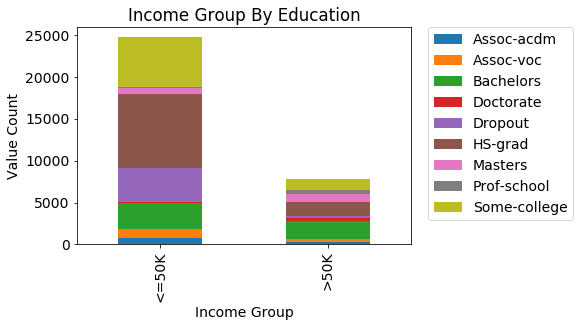

In [30]:
inc_ed=income.groupby(['Income.Group', 'Education'])['Income.Group'].count().unstack('Education')


my_plot = inc_ed.plot(kind='bar',stacked=True,title="Income Group By Education")
my_plot.set_xlabel("Income Group")
my_plot.set_ylabel("Value Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.show()

# Modeling 

Since most classifiers work poorly, if they work at all, with class variables, I transformed every class into a dummy variable with binary (0,1) values. 

In [31]:
income.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [32]:
catvar=['Workclass','Education','Marital.Status','Occupation','Relationship','Race','Sex','Native.Country']
for var in catvar:

    cat_list='var'+'_'+var

    cat_list = pd.get_dummies(income[var], prefix=var)

    income1=income.join(cat_list)

    income=income1
    
catvar=['Workclass','Education','Marital.Status','Occupation','Relationship','Race','Sex','Native.Country']


income_vars=income.columns.values.tolist()

to_keep=[i for i in income_vars if i not in catvar]

income_final=income[to_keep]
income_final.columns.values




array(['ID', 'Age', 'Hours.Per.Week', 'Income.Group',
       'Workclass_Federal-gov', 'Workclass_Local-gov',
       'Workclass_Never-worked', 'Workclass_Private',
       'Workclass_Self-emp-inc', 'Workclass_Self-emp-not-inc',
       'Workclass_State-gov', 'Workclass_Without-pay',
       'Education_Assoc-acdm', 'Education_Assoc-voc',
       'Education_Bachelors', 'Education_Doctorate', 'Education_Dropout',
       'Education_HS-grad', 'Education_Masters', 'Education_Prof-school',
       'Education_Some-college', 'Marital.Status_Divorced',
       'Marital.Status_Married-AF-spouse',
       'Marital.Status_Married-civ-spouse',
       'Marital.Status_Married-spouse-absent',
       'Marital.Status_Never-married', 'Marital.Status_Separated',
       'Marital.Status_Widowed', 'Occupation_Adm-clerical',
       'Occupation_Armed-Forces', 'Occupation_Craft-repair',
       'Occupation_Exec-managerial', 'Occupation_Farming-fishing',
       'Occupation_Handlers-cleaners', 'Occupation_Machine-op-inspct

The ID variable is irrelevant to the model so i proceed to drop it from the DF all together and then assign the target variable to 'Y' and the predictor variables to 'X'



Due to the creation of the dummy variables, we now have 54 Coloumns making it harder to identify which variables are significant to the model. To figure this out, I use a Recursive feature elimination (RFE) model for variable selection 

Recursive feature elimination is based on the idea to repeatedly construct a model (for example an SVM or a regression model) and choose either the best or worst performing feature (for example based on coefficients), setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. Features are then ranked according to when they were eliminated. As such, it is a greedy optimization for finding the best performing subset of features.

I set the RFE to big the best 35 variables to use for the model. This value is a bit arbitrary based on trial and error optimization, trying to find the best balance between model strength and algorithm runtime. 

This also prevents overfitting. 

In [33]:

income_final=income_final.drop('ID',axis=1)
income_final.head()



,Age,Hours.Per.Week,Income.Group,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Education_Assoc-acdm,Education_Assoc-voc,Education_Bachelors,Education_Doctorate,Education_Dropout,Education_HS-grad,Education_Masters,Education_Prof-school,Education_Some-college,Marital.Status_Divorced,Marital.Status_Married-AF-spouse,Marital.Status_Married-civ-spouse,Marital.Status_Married-spouse-absent,Marital.Status_Never-married,Marital.Status_Separated,Marital.Status_Widowed,Occupation_Adm-clerical,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_Husband,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Female,Sex_Male,Native.Country_Foreign,Native.Country_United-States
0,39,40,<=50K,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
1,50,13,<=50K,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,38,40,<=50K,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
3,53,40,<=50K,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,28,40,<=50K,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [34]:
y=['Income.Group']

X=[i for i in income_final if i not in y]


In [35]:
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg,35)

rfe = rfe.fit(income_final[X], income_final[y] )

print(rfe.support_)
print(rfe.ranking_)

[False False  True False False False  True False False  True  True  True
 False  True  True  True  True  True  True False  True  True False  True
  True False  True False  True  True  True  True False  True  True  True
  True  True  True  True False False  True  True False  True  True False
 False  True False  True False  True  True]
[18 15  1 10  8  4  1 13 20  1  1  1 11  1  1  1  1  1  1  3  1  1  2  1
  1  9  1  7  1  1  1  1 19  1  1  1  1  1  1  1  6 21  1  1  5  1  1 17
 12  1 16  1 14  1  1]


In [36]:
rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
        True,  True, False, False,  True, False,  True, False,  True,
        True])

In [37]:
sel=pd.DataFrame(rfe.support_)

In [38]:
sel.head()

,0
0,False
1,False
2,True
3,False
4,False


In [39]:
sel=sel.transpose()
sel

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,False,False,True,False,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,False,True,True,False,True,True,False,True,False,True,True,True,True,False,True,True,True,True,True,True,True,False,False,True,True,False,True,True,False,False,True,False,True,False,True,True


In [40]:
cols=income_final.drop("Income.Group",axis=1).columns.values
cols

array(['Age', 'Hours.Per.Week', 'Workclass_Federal-gov',
       'Workclass_Local-gov', 'Workclass_Never-worked',
       'Workclass_Private', 'Workclass_Self-emp-inc',
       'Workclass_Self-emp-not-inc', 'Workclass_State-gov',
       'Workclass_Without-pay', 'Education_Assoc-acdm',
       'Education_Assoc-voc', 'Education_Bachelors',
       'Education_Doctorate', 'Education_Dropout', 'Education_HS-grad',
       'Education_Masters', 'Education_Prof-school',
       'Education_Some-college', 'Marital.Status_Divorced',
       'Marital.Status_Married-AF-spouse',
       'Marital.Status_Married-civ-spouse',
       'Marital.Status_Married-spouse-absent',
       'Marital.Status_Never-married', 'Marital.Status_Separated',
       'Marital.Status_Widowed', 'Occupation_Adm-clerical',
       'Occupation_Armed-Forces', 'Occupation_Craft-repair',
       'Occupation_Exec-managerial', 'Occupation_Farming-fishing',
       'Occupation_Handlers-cleaners', 'Occupation_Machine-op-inspct',
       'Occupation_

In [41]:
sel.columns=cols

In [42]:
sel

,Age,Hours.Per.Week,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Education_Assoc-acdm,Education_Assoc-voc,Education_Bachelors,Education_Doctorate,Education_Dropout,Education_HS-grad,Education_Masters,Education_Prof-school,Education_Some-college,Marital.Status_Divorced,Marital.Status_Married-AF-spouse,Marital.Status_Married-civ-spouse,Marital.Status_Married-spouse-absent,Marital.Status_Never-married,Marital.Status_Separated,Marital.Status_Widowed,Occupation_Adm-clerical,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_Husband,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Female,Sex_Male,Native.Country_Foreign,Native.Country_United-States
0,False,False,True,False,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,False,True,True,False,True,True,False,True,False,True,True,True,True,False,True,True,True,True,True,True,True,False,False,True,True,False,True,True,False,False,True,False,True,False,True,True


In [43]:
scols=sel.columns.tolist()

cols2=[var for var in scols if sel[var][0]==True]



In [44]:
cols2

['Workclass_Federal-gov',
 'Workclass_Self-emp-inc',
 'Workclass_Without-pay',
 'Education_Assoc-acdm',
 'Education_Assoc-voc',
 'Education_Doctorate',
 'Education_Dropout',
 'Education_HS-grad',
 'Education_Masters',
 'Education_Prof-school',
 'Education_Some-college',
 'Marital.Status_Married-AF-spouse',
 'Marital.Status_Married-civ-spouse',
 'Marital.Status_Never-married',
 'Marital.Status_Separated',
 'Occupation_Adm-clerical',
 'Occupation_Craft-repair',
 'Occupation_Exec-managerial',
 'Occupation_Farming-fishing',
 'Occupation_Handlers-cleaners',
 'Occupation_Other-service',
 'Occupation_Priv-house-serv',
 'Occupation_Prof-specialty',
 'Occupation_Protective-serv',
 'Occupation_Sales',
 'Occupation_Tech-support',
 'Occupation_Transport-moving',
 'Relationship_Other-relative',
 'Relationship_Own-child',
 'Relationship_Wife',
 'Race_Amer-Indian-Eskimo',
 'Race_Other',
 'Sex_Female',
 'Native.Country_Foreign',
 'Native.Country_United-States']

In [45]:
X=income_final[cols2]

y=income_final['Income.Group']

X.head()

,Workclass_Federal-gov,Workclass_Self-emp-inc,Workclass_Without-pay,Education_Assoc-acdm,Education_Assoc-voc,Education_Doctorate,Education_Dropout,Education_HS-grad,Education_Masters,Education_Prof-school,Education_Some-college,Marital.Status_Married-AF-spouse,Marital.Status_Married-civ-spouse,Marital.Status_Never-married,Marital.Status_Separated,Occupation_Adm-clerical,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_Other-relative,Relationship_Own-child,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Other,Sex_Female,Native.Country_Foreign,Native.Country_United-States
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0


The final predictive variables are seen above. 

We now divide our dataset into test and train splits and train them with 3 different classifiers, namely, Random Forests, Logistic Regression and Decision Trees and test them for their strengths 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))




Accuracy of logistic regression classifier on test set: 0.83


In [48]:
from sklearn import model_selection

from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)

modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)

print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.832


In [49]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)


confusion_matrix

array([[6819,  588],
       [1071, 1291]])

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))



             precision    recall  f1-score   support

      <=50K       0.86      0.92      0.89      7407
       >50K       0.69      0.55      0.61      2362

avg / total       0.82      0.83      0.82      9769



In [51]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()

In [52]:
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
y_pred2 = RFC.predict(X_test)

print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(RFC.score(X_test, y_test)))





Accuracy of Random Forest classifier on test set: 0.82


In [54]:
modelCV2 = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV2, X_train, y_train, cv=kfold, scoring=scoring)

print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.824


In [55]:
from sklearn import tree

DTC = tree.DecisionTreeClassifier()
DTC

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
DTC.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
y_pred3=DTC.predict(X_test)
print('Accuracy of Decision Treee classifier on test set: {:.2f}'.format(DTC.score(X_test, y_test)))



Accuracy of Decision Treee classifier on test set: 0.82


In [58]:
print('\nRandom Forests')
print(classification_report(y_test, y_pred2))



print('\nLogistic Regression')
print(classification_report(y_test, y_pred))



print('\nDecision Trees')
print(classification_report(y_test, y_pred3))





Random Forests
             precision    recall  f1-score   support

      <=50K       0.86      0.92      0.89      7407
       >50K       0.67      0.52      0.58      2362

avg / total       0.81      0.82      0.81      9769


Logistic Regression
             precision    recall  f1-score   support

      <=50K       0.86      0.92      0.89      7407
       >50K       0.69      0.55      0.61      2362

avg / total       0.82      0.83      0.82      9769


Decision Trees
             precision    recall  f1-score   support

      <=50K       0.86      0.92      0.89      7407
       >50K       0.67      0.52      0.58      2362

avg / total       0.81      0.82      0.81      9769



As you can see, all three classifiers give about the same results with the Logistic Regression slightly edging out the other models with regards to picking up the ">50K" class as seen in both its precision and recall of that particular class